In [2]:
import gzip
import json
import pandas as pd
import ast


In [5]:

def A_txt(nombre_archivo_gz,nombre_archivo_descomprimido):
    # Nombre del archivo comprimido .gz


    # Nombre del archivo descomprimido lo paso a txt, para luego hacer una lectura linea por linea
    #nombre_archivo_descomprimido = 'users_items.txt'  # lo grabare como txt

    with gzip.open(nombre_archivo_gz, 'rb') as archivo_comprimido, open(nombre_archivo_descomprimido, 'wb') as archivo_descomprimido:
        contenido_comprimido = archivo_comprimido.read()
        archivo_descomprimido.write(contenido_comprimido)

# Ahora, el contenido del archivo comprimido se ha descomprimido y se ha guardado en el archivo descomprimido.


In [7]:
def leo_lineaxlinea(arch_txt):
    # Listas para almacenar los diccionarios y los números de línea con errores
    data_list = []
    lineas_con_errores = []

    # Contadores para el total de líneas y registros leídos correctamente
    total_lineas = 0
    registros_correctos = 0

    # Abrir el archivo y leerlo línea por línea
    with open(arch_txt, 'r', encoding='utf-8') as archivo:
        for num_linea, linea in enumerate(archivo, start=1):
            total_lineas += 1
            try:
            # Intentar cargar la línea como JSON
                data = json.loads(linea)
                data_list.append(data)
                registros_correctos += 1
            except json.JSONDecodeError:
                try:
                    # Si falla como JSON, intentar cargarlo como diccionario
                    data = eval(linea)  # Usa eval para interpretar la línea como un diccionario
                    if isinstance(data, dict):
                        data_list.append(data)
                        registros_correctos += 1
                    else:
                         lineas_con_errores.append(num_linea)
                except Exception as e:
                    lineas_con_errores.append(num_linea)
    # Imprimir los resultados
    print(f'Total de líneas o registros: {total_lineas}')
    print(f'Registros leídos correctamente: {registros_correctos}')
    print(f'Registros mal leídos en líneas: {lineas_con_errores}')
    
    return data_list

    

In [62]:
# Crear un DataFrame a partir de games
A_txt("steam_games.json.gz","steam_games.txt")
lista=leo_lineaxlinea("steam_games.txt")
df_games = pd.DataFrame(lista)


Total de líneas o registros: 120445
Registros leídos correctamente: 120445
Registros mal leídos en líneas: []


In [28]:
#borro los que sean todos nulos
df_games.dropna(how="all",inplace=True)

In [34]:
#borro url por consideralo irrelevante para el analisis de la informacion
df_games=df_games.drop(["url"],axis=1)

In [38]:
# evaluo si 2 columnas son iguales
son_iguales = df_games['app_name'] == df_games['title']

# Verificar si todas las filas son iguales
if son_iguales.all():
    print("Todas las filas en 'columna1' y 'columna2' son iguales.")
else:
    print("Las columnas 'columna1' y 'columna2' tienen diferencias en algunas filas.")


Las columnas 'columna1' y 'columna2' tienen diferencias en algunas filas.


In [39]:
diferencias = df_games['app_name'] != df_games['title']
contador_diferencias = diferencias.sum()

print("Número de filas con diferencias entre 'columna1' y 'columna2':", contador_diferencias)


Número de filas con diferencias entre 'columna1' y 'columna2': 2605


In [ ]:
diferencias = df_games[df_games['app_name'] != df_games['title']]
diferencias.head(200)


In [44]:
#borro la columna title ya que es igual a app_name y cuando son distintas esta en Nan
df_games=df_games.drop(["title"],axis=1)

In [46]:
df_games=df_games.reindex()



In [ ]:
df_games[df_games["id"]=="761140"]

In [57]:
#ordeno el df por clave id para ver si hay duplicados
df_games = df_games.sort_values(by='app_name')


In [65]:
df_games.reset_index(inplace=True)

In [54]:
df_games.drop(32133, inplace=True)
df_games.reset_index(inplace=True)

In [59]:
del df_games["index"]
del df_games["level_0"]

In [64]:
# Elimino esa fila por contener muchos nan
indices_a_eliminar = df_games[df_games["id"] == "317160"].index

# Eliminar las filas utilizando el método drop
df_games.drop(indices_a_eliminar, inplace=True)


In [67]:
df_games=df_games.drop(["index"],axis=1)

In [72]:
# borro tags x considerarlo irrelevante
df_games=df_games.drop(["tags"],axis=1)

In [ ]:
df_games["genres"]

In [82]:
df_games["genres"].fillna("", inplace=True)

In [95]:
# Supongamos que tienes un DataFrame df_games y deseas encontrar las filas con valores iguales en la columna "app_name"
filas_duplicadas = df_games2[df_games2.duplicated(subset="app_name", keep=False)]

# Mostrar las filas duplicadas
filas_duplicadas

,publisher,genres,app_name,release_date,reviews_url,specs,price,early_access,id,developer


In [89]:


# Eliminar las filas duplicadas por "app_name" y aquellas en las que al menos una columna es None
# para posterior control copio en otro dataframe
df_games2 = df_games.dropna(subset=["app_name"]).drop_duplicates(subset="app_name", keep="first")


In [96]:
df_games=df_games2

In [97]:
df_games

,publisher,genres,app_name,release_date,reviews_url,specs,price,early_access,id,developer
0,WTFOMGames,"[Action, Adventure, Casual, Indie]",! That Bastard Is Trying To Steal Our Gold !,2016-03-01,http://steamcommunity.com/app/449940/reviews/?...,"[Single-player, Steam Trading Cards, Partial C...",3.99,False,449940,WTFOMGames
1,NaN,,"""BUTTS: The VR Experience""",NaN,http://steamcommunity.com/app/439260/reviews/?...,"[Single-player, HTC Vive]",0.99,False,439260,NaN
2,NaN,"[Action, Free to Play, Indie, Massively Multip...","""Barely Attuned Magic Thingy"" Staff",2014-06-19,http://steamcommunity.com/app/308163/reviews/?...,"[Multi-player, MMO, Co-op, Cross-Platform Mult...",NaN,False,308163,Wild Shadow Studios
3,WTFOMGames,"[Casual, Indie, Sports, Strategy]","""Glow Ball"" - The billiard puzzle game",2014-02-19,http://steamcommunity.com/app/388390/reviews/?...,"[Single-player, Steam Trading Cards, Partial C...",4.99,False,388390,WTFOMGames
4,NaN,"[Casual, Simulation]","""Just Another Day"" - Seduce Me Otome CD",2015-08-01,http://steamcommunity.com/app/454790/reviews/?...,"[Single-player, Downloadable Content]",4.99,False,454790,Michaela Laws
...,...,...,...,...,...,...,...,...,...,...
32128,NaN,"[Adventure, Casual, Indie, Simulation]",（尘沙惑设定集）Lost in Secular Love - Concept Design ...,2016-10-28,http://steamcommunity.com/app/541220/reviews/?...,"[Single-player, Downloadable Content, Steam Ac...",3.99,False,541220,YETU GAME
32129,"Mindware Co.,Ltd.","[Action, Casual, Indie, Early Access]",４人打ちアクション麻雀 / ACTION MAHJONG,2017-02-24,http://steamcommunity.com/app/575810/reviews/?...,"[Single-player, Multi-player, Local Multi-Play...",9.99,True,575810,"Mindware Co.,Ltd."
32130,Fancy Fish Games,"[Adventure, Indie]",＜/reality＞,2017-04-18,http://steamcommunity.com/app/562280/reviews/?...,"[Single-player, Steam Achievements, Full contr...",11.99,False,562280,Fancy Fish Games
32131,NaN,"[Adventure, Indie]",＜/reality＞ Original Soundtrack,2017-04-18,http://steamcommunity.com/app/626850/reviews/?...,"[Single-player, Downloadable Content]",3.99,False,626850,Fancy Fish Games


In [99]:
del df_games2

In [105]:
# Crear una lista vacía para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_games.iterrows():
    items = row['genres']  # Obtener la lista de diccionarios en 'genres'
    
    for item in items:
        # Crear una copia del diccionario de "genres"
        desanidado_item = {'genres':item}
        
        # Agregar otras columnas del DataFrame original
        desanidado_item['publisher'] = row['publisher']
        desanidado_item['app_name'] = row['app_name']
        desanidado_item['release_date'] = row['release_date']
        desanidado_item['reviews_url'] = row['reviews_url']
        desanidado_item['specs'] = row['specs']
        desanidado_item['price'] = row['price']
        desanidado_item['early_access'] = row['early_access']
        desanidado_item['id'] = row['id']
        desanidado_item['developer'] = row['developer']
        
        # Agregar el diccionario a la lista desanidada
        desanidado.append(desanidado_item)


# Crear un nuevo DataFrame a partir de la lista desanidada
df_gamesd = pd.DataFrame(desanidado)


In [ ]:
from datetime import datetime
import re
# Arreglo fechas porque tenian diferentes formatos
df_gamesd['release_date']=df_gamesd['release_date'].fillna("0000-00-00")

def es_formato_fecha(cadena):
    # Define un patrón de expresión regular para el formato de fecha "YYYY-MM-DD".
    patron_fecha = r'^\d{4}-\d{2}-\d{2}$'
    
    # Intenta hacer coincidir la cadena con el patrón de fecha.
    if re.match(patron_fecha, cadena):
        return True
    else:
        return False

def convertir_fecha(fecha_str):
    
    if es_formato_fecha(fecha_str):
        return fecha_str
    # Mapeo de nombres de meses
    nombres_meses = {
        'Jan': '01',
        'Feb': '02',
        'Mar': '03',
        'Apr': '04',
        'May': '05',
        'Jun': '06',
        'Jul': '07',
        'Aug': '08',
        'Sep': '09',
        'Oct': '10',
        'Nov': '11',
        'Dec': '12'
    }

    # Dividir la fecha en mes y año
    partes = fecha_str.split()
    if len(partes) != 2:
        return "0000-00-00"  # Devolver None si el formato no es válido

    mes = nombres_meses.get(partes[0])
    año = partes[1]

    if not mes:
        return "0000-00-00"   # Devolver None si el nombre del mes no es válido

    # Formatear la fecha en el formato deseado (Año-Mes-Día)
    fecha_formateada = f"{año}-{mes}-01"
    
    return fecha_formateada

# Aplicar la función a la columna 'release_date' y crear una nueva columna 'fecha_formateada'
df_gamesd['release_date'] = df_gamesd['release_date'].apply(convertir_fecha)

In [31]:
# Escribo csv de GAMES
df_gamesd.to_csv('games.csv', index=False) 

In [32]:
df_games=pd.read_csv('games.csv')

In [ ]:
df_games.info()

In [5]:
# Crear un DataFrame a partir de user_items
A_txt("users_items.json.gz","users_items.txt")
lista=leo_lineaxlinea("users_items.txt")
df_items = pd.DataFrame(lista)

Total de líneas o registros: 88310
Registros leídos correctamente: 88310
Registros mal leídos en líneas: []


In [ ]:

# quiero ver que tiene items
pd.set_option('display.max_colwidth',200)
df_items[["user_id","items",'playtime_forever']]

In [22]:
# Utiliza apply y keys() para obtener las claves en la columna items
key_columns = df_items['items'].apply(lambda x: [list(d.keys()) for d in x] if isinstance(x, list) else [])

In [60]:
df_items.head(2)

,user_id,items_count,steam_id,user_url,items,playtime_forever
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[6, 0, 7, 0, 0, 0, 0, 0, 4733, 1853, 333, 75, ..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[0, 0, 0, 220, 0, 0, 0, 62, 0, 0, 0, 0, 0, 0, ..."


In [9]:
#Desanidar items

# Crear una lista vacía para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_items.iterrows():
    items = row['items']  # Obtener la lista de diccionarios en 'items'
    for item in items:
        desanidado_item = item.copy()  # Crear una copia del diccionario
        desanidado_item['user_id'] = row['user_id']  # Agregar 'user_id' al diccionario
        #desanidado_item['items_count'] = row['items_count']  # Agregar 'user_id' al diccionario
        #desanidado_item['user_url'] = row['user_url']  # Agregar 'user_url al diccionario
        desanidado.append(desanidado_item)

# Crear un nuevo DataFrame a partir de la lista desanidada
df_items_desanidado = pd.DataFrame(desanidado)


In [10]:
df_items_desanidado.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479


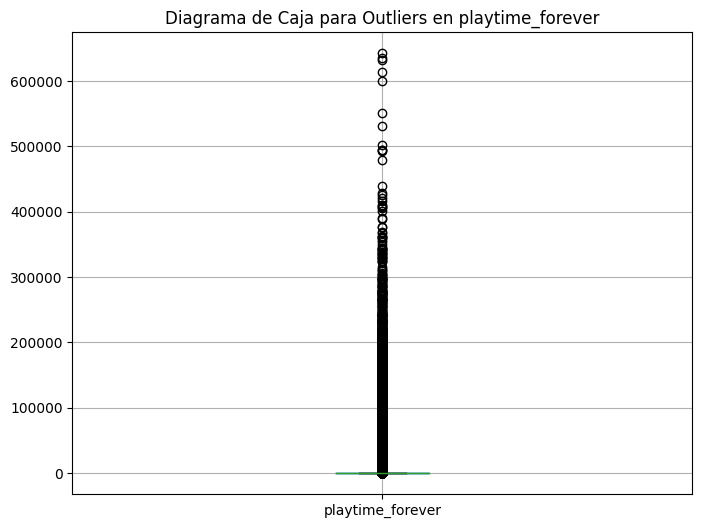

In [13]:
import matplotlib.pyplot as plt

# Visualizar los outliers en "playtime_forever"
columna = 'playtime_forever'

# Crear un diagrama de caja para identificar outliers
plt.figure(figsize=(8, 6))
df_items_desanidado.boxplot(column=columna)
plt.title('Diagrama de Caja para Outliers en ' + columna)
plt.show()


In [20]:
#borro los registros con forever mayor a 350000 son 243 dias de juego total por año
subset=df_items_desanidado[df_items_desanidado["playtime_forever"]>300000]

subset

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
9010,4000,Garry's Mod,303466,8117,76561198078738103
29909,313740,Sakura Spirit,400827,9055,Forty-Nine
190851,1250,Killing Floor,366892,112,76561197961702279
231613,4000,Garry's Mod,428012,6021,Jaxon1049
234571,363970,Clicker Heroes,333482,8077,idonothack
...,...,...,...,...,...
4075729,42710,Call of Duty: Black Ops - Multiplayer,632452,8126,76561198019826668
4254471,4000,Garry's Mod,324449,0,DarrenDingo
4492979,268420,Aura Kingdom,337453,0,76561198054840158
4498897,4000,Garry's Mod,344931,0,76561198055326819


In [ ]:
df_items_desanidado.info()

In [ ]:
df_items_desanidado= df_items_desanidado.sort_values(by='item_id')
# Ordenar de forma ascendente
df_items_desanidado

In [ ]:
subset=df_items_desanidado[df_items_desanidado["user_id"]== "henryle"]
subset

In [21]:
df_items_desanidado.dropna(how="all",inplace=True)

In [24]:
# Escribo csv
df_items_desanidado.to_csv('df_items1.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo

In [88]:
pd.set_option('display.max_colwidth', 50)

In [9]:
# desanidar el campo que necesito

# Utilizo apply para extraer la clave 'review' en cada fila y creo una columna review
df_items['playtime_forever'] = df_items['items'].apply(lambda x: [item['playtime_forever'] for item in x])
 


In [ ]:
df_items['playtime_forever']

In [8]:
# Crear un DataFrame a partir de user_reviews
A_txt("user_reviews.json.gz","user_review.txt")
lista=leo_lineaxlinea("user_review.txt")
df_ur = pd.DataFrame(lista)


Total de líneas o registros: 25799
Registros leídos correctamente: 25799
Registros mal leídos en líneas: []


In [23]:
df_ur.head(2)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."


In [9]:
# EXTRAIGO SOLO LAS QUE NECESITO  DEL USER_REVIWS

# Utilizo apply para extraer las claves que necesito
df_ur['review'] = df_ur['reviews'].apply(lambda x: [item['review'] for item in x])

df_ur['recommend'] = df_ur['reviews'].apply(lambda x: [item['recommend'] for item in x])
df_ur['item_id'] = df_ur['reviews'].apply(lambda x: [item['item_id'] for item in x])
df_ur['posted'] = df_ur['reviews'].apply(lambda x: [item['posted'] for item in x])
# Elimina la columna original 'reviews' si ya no la necesitas
#df_ur = df_ur.drop('reviews', axis=1)

# Imprime el DataFrame resultante
df_ur.head(2)


,user_id,user_url,reviews,review,recommend,item_id,posted
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",[Simple yet with great replayability. In my op...,"[True, True, True]","[1250, 22200, 43110]","[Posted November 5, 2011., Posted July 15, 201..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",[I know what you think when you see this title...,"[True, True, True]","[251610, 227300, 239030]","[Posted June 24, 2014., Posted September 8, 20..."


In [ ]:
df_ur['posted'].head(20)


In [ ]:
pd.set_option('display.max_colwidth', 500)
# nada mas para mirar
df_ur[["review"]	]


In [ ]:
# creo la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP
# con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. 
# Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos 
# de machine learning y el análisis de datos. 
# De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.


from textblob import TextBlob


# Función para realizar el análisis de sentimiento y mapear a la escala deseada
def analizo_sentimiento(text):
    if not isinstance(text, str):
        text = str(text)  # Convierte la entrada a una cadena de texto

    if not text:
        return 1  # Neutral si no hay reseña
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity

    if sentiment_score < 0:
        return 0  # Malo si el sentimiento es negativo
    elif sentiment_score > 0:
        return 2  # Positivo si el sentimiento es positivo
    else:
        return 1  # Neutral si el sentimiento es neutral

# Aplicar el análisis de sentimiento y crear la nueva columna
df_ur['sentiment_analysis'] = df_ur['review'].apply(analizo_sentimiento)

# Imprimir el DataFrame resultante
df_ur


In [34]:
type(df_ur['item_id'][0])

list

In [ ]:
# DESANIDO ITEMS
import re

# Cadena que contiene las fechas
cadena = "Posted November 5, 2011., Posted July 15, 2011., Posted April 21, 2011."

# Crear una lista para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_ur.iterrows():
    item_id = row['item_id'] # le saco los corchetes
    
    #le saco primer y ultimo caracter
    recommend = row['recommend']#le saco primer y ultimo caracter
    anio=row['posted']
      
    
    for item1, item2,item3 in zip(item_id, recommend,anio):
                
        # Usar una expresión regular para encontrar los años en la cadena
        item3=re.findall(r'\d{4}', item3)
        print(item3)
        if item3:
            item3= int(item3[0])
        else: item3=0 
        
        desanidado_item = {'item_id': item1, 'recommend': item2, 'anio':item3}
        # Agregar otras columnas del DataFrame original
        desanidado_item['user_id'] = row['user_id']
        desanidado_item['sentiment_analysis'] = row['sentiment_analysis']
        desanidado.append(desanidado_item)

# Crear un DataFrame a partir de la lista desanidada
df_urd = pd.DataFrame(desanidado)


In [66]:
df_ur.head(2)

,item_id,recommend,anio,user_id,sentiment_analysis
0,1250,True,2011,76561197970982479,2
1,22200,True,2011,76561197970982479,2


In [11]:
# Escribo csv
df_urd.to_csv('user_review.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo


In [5]:
import pandas as pd
#PREPARO DATOS PARA FUNCION 1 Y 2
df_games=pd.read_csv("games.csv")


In [6]:
import numpy as np

# Elimina filas con valores no finitos
df_games = df_games.dropna(subset=['id'])
df = df_games[~df_games['id'].isin([np.inf, -np.inf])]
# Convertir la columna "id" a tipo de dato int porque esta florante para q no ocupe espacio
df_games['id'] = df_games['id'].astype(int)

In [ ]:
df_games.head()

In [7]:
df_item=pd.read_csv("df_items1.csv")
df_item.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,10,Counter-Strike,18,0,Gutzen
2,10,Counter-Strike,1,0,76561198092430936
3,10,Counter-Strike,5959,93,henryle
4,10,Counter-Strike,0,0,DeadPowerGamer


In [ ]:
df_games.info()

In [8]:

df_games=df_games.drop(['publisher','app_name', 'reviews_url','specs','price', 'early_access','developer'],axis=1)
df_item=df_item.drop(['item_name','playtime_2weeks'],axis=1)
df_item = df_item.set_index('item_id')


# Supongamos que tienes los DataFrames df_generos y df_item
# Realiza el merge de ambos DataFrames
merged_df = pd.merge(df_games, df_item, left_on='id', right_on='item_id', how='inner')
# Extraer los primeros cuatro caracteres de "release_date" y convertirlos a enteros
merged_df=merged_df.dropna()
merged_df['anio'] = merged_df['release_date'].str[:4]
#merged_df.drop(['release_date','user_id'],axis=1) mejor no la borro xq sirve par funcion2


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975166 entries, 0 to 9975165
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   genres            object
 1   release_date      object
 2   id                int32 
 3   playtime_forever  int64 
 4   user_id           object
 5   anio              object
dtypes: int32(1), int64(1), object(4)
memory usage: 418.6+ MB


In [ ]:
#para ver si la fecha tiene formato correcto despues de todas las transformaciones
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], format='%Y-%m-%d', errors='coerce')

In [12]:
# Agrupar por "genres" y anio sumar la columna "time_forever"
resultados_agrupados = merged_df.groupby('genres','anio')['playtime_forever']

ValueError: No axis named anio for object type DataFrame

In [10]:
resultados_agrupados

anio
0000      10594265
1983         10746
1984          1152
1987          7951
1988         88479
1989         15015
1990         26311
1991          5723
1992         30522
1993        280722
1994        195862
1995        353247
1996        244713
1997       1305725
1998       3683757
1999       5704613
2000      18966142
2001       2811425
2002       3672241
2003      49237951
2004     135301116
2005      17833015
2006     937865491
2007      35425484
2008      69464220
2009     258921747
2010     520194432
2011    1166946671
2012    1804316556
2013    1567807325
2014     637877193
2015    1305542331
2016     485126412
2017     651255395
2018         16725
Name: playtime_forever, dtype: int64

In [7]:
# para las primeras 2 funciones no me sirve ya tengo el año
del merged_df['release_date']

In [ ]:
# Escribo csv
merged_df.to_csv('Generos_fecha.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo

merged_df

In [9]:
del merged_df # libero la memoria

In [11]:
import pandas as pd
#preparo csv par funcion 3
df_games=pd.read_csv("games.csv")



In [19]:
df_ur=pd.read_csv('user_reviews.csv')
df_item=pd.read_csv('df_items1.csv')

In [22]:
df_item=df_item[['item_id','item_name']]

In [ ]:
# valores unicos para despues hacer el merge
df_item = df_item[['item_id', 'item_name']].drop_duplicates()
df_item

In [41]:
# Escribo csv
df_urd.to_csv('funcion3.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo

In [56]:
df_ur=pd.read_csv("funcion3.csv")

In [58]:
df_ur['item_id']=df_ur['item_id'].astype(int)

In [46]:
df_item=pd.read_csv("df_items1.csv")

In [50]:
df_item=df_item.drop(['playtime_forever','playtime_2weeks','user_id'],axis=1)

In [51]:
df_item.drop_duplicates(inplace=True) # quero codigo nombre para hacer el merge 

In [60]:
# CREO CSV PARA FUNCIONES 3-4 Y 5
# Realizo el merge de ambos DataFrames
merged_df = pd.merge(df_ur, df_item, left_on='item_id', right_on='item_id', how='inner')

In [63]:
merged_df=merged_df.sort_values(by='item_id')


In [65]:
# Escribo csv
merged_df.to_csv('func_3.csv', index=False) 